In [45]:
# step 1. import all the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [46]:
# step 2. Load the dataset

df=pd.read_csv('/content/hospital_queue_urgency_dataset.csv')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   patient_id             100000 non-null  int64  
 1   age                    100000 non-null  int64  
 2   urgency_level          100000 non-null  int64  
 3   visit_type             100000 non-null  int64  
 4   arrival_time           100000 non-null  float64
 5   patients_in_queue      100000 non-null  int64  
 6   avg_consult_time       100000 non-null  int64  
 7   doctors_available      100000 non-null  int64  
 8   doctor_experience_avg  100000 non-null  float64
 9   department             100000 non-null  int64  
 10  is_elderly             100000 non-null  int64  
 11  arrival_slot           100000 non-null  int64  
 12  queue_growth_rate      100000 non-null  float64
 13  is_peak_hour           100000 non-null  int64  
 14  doctor_utilization     100000 non-nul

In [48]:
df.shape

(100000, 20)

In [49]:
df.describe()

,patient_id,age,urgency_level,visit_type,arrival_time,patients_in_queue,avg_consult_time,doctors_available,doctor_experience_avg,department,is_elderly,arrival_slot,queue_growth_rate,is_peak_hour,doctor_utilization,priority_score,wait_time_expected,wait_time_min,wait_time_max,overload_risk
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,45.031790,0.390930,0.649390,13.999691,24.510470,11.977870,3.002380,10.985158,0.550390,0.338050,0.998110,1.547877,0.410300,11.193827,1.99826,132.710785,127.422307,139.201495,1.458540
std,28867.657797,25.770433,0.616285,0.725554,3.461494,14.445887,4.323224,1.415046,5.190179,0.740518,0.473048,0.815115,0.837018,0.491891,10.595465,2.10809,142.759512,142.579446,142.770961,0.781362
min,1.000000,1.000000,0.000000,0.000000,8.000000,0.000000,5.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.00000,0.000000,0.000000,3.000671,0.000000
25%,25000.750000,23.000000,0.000000,0.000000,11.020000,12.000000,8.000000,2.000000,6.500000,0.000000,0.000000,0.000000,0.820000,0.000000,4.000000,0.00000,39.600000,34.067984,46.031975,1.000000
50%,50000.500000,45.000000,0.000000,1.000000,13.980000,24.000000,12.000000,3.000000,11.000000,0.000000,0.000000,1.000000,1.550000,0.000000,8.000000,2.00000,87.590000,82.153214,94.134219,2.000000
75%,75000.250000,67.000000,1.000000,1.000000,16.992500,37.000000,16.000000,4.000000,15.500000,1.000000,1.000000,2.000000,2.270000,1.000000,14.330000,3.00000,169.670000,164.264520,176.140019,2.000000
max,100000.000000,89.000000,2.000000,2.000000,20.000000,49.000000,19.000000,5.000000,20.000000,2.000000,1.000000,2.000000,3.000000,1.000000,49.000000,9.00000,940.310000,935.076628,947.105713,2.000000


In [50]:
df.isnull().sum()

,0
patient_id,0
age,0
urgency_level,0
visit_type,0
arrival_time,0
patients_in_queue,0
avg_consult_time,0
doctors_available,0
doctor_experience_avg,0
department,0


In [51]:
# load the statistical measure of column 'wait_time_expected'

df["wait_time_expected"].describe()

,wait_time_expected
count,100000.000000
mean,132.710785
std,142.759512
min,0.000000
25%,39.600000
50%,87.590000
75%,169.670000
max,940.310000


# Exploratory Data Analysis (EDA)

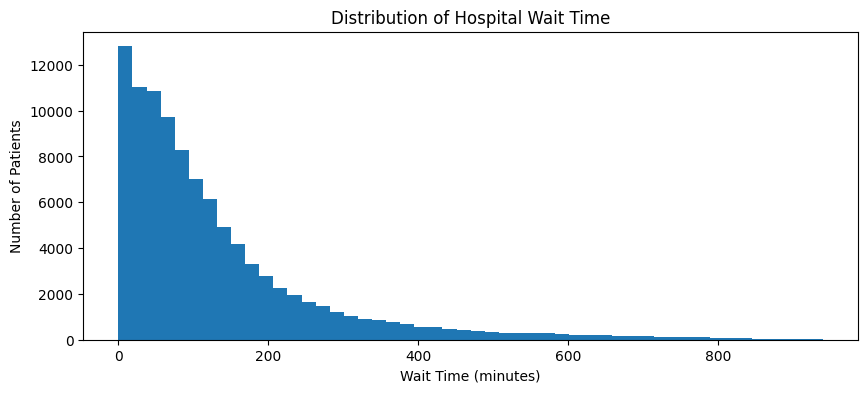

In [52]:
# Distribution of Hospital Wait Time

plt.figure(figsize=(10,4))
plt.hist(df["wait_time_expected"], bins=50)
plt.xlabel("Wait Time (minutes)")
plt.ylabel("Number of Patients")
plt.title("Distribution of Hospital Wait Time")
plt.show()

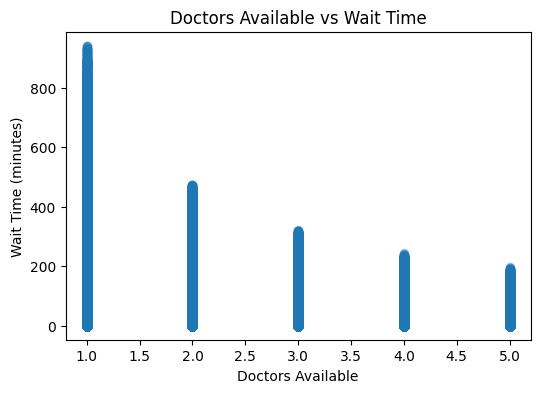

In [53]:
# Doctors Available vs Wait Time

plt.figure(figsize=(6,4))
plt.scatter(df["doctors_available"], df["wait_time_expected"], alpha=0.3)
plt.xlabel("Doctors Available")
plt.ylabel("Wait Time (minutes)")
plt.title("Doctors Available vs Wait Time")
plt.show()

In [54]:
df.groupby("urgency_level")["wait_time_expected"].mean()


,wait_time_expected
urgency_level,
0,134.574492
1,130.106583
2,123.986343


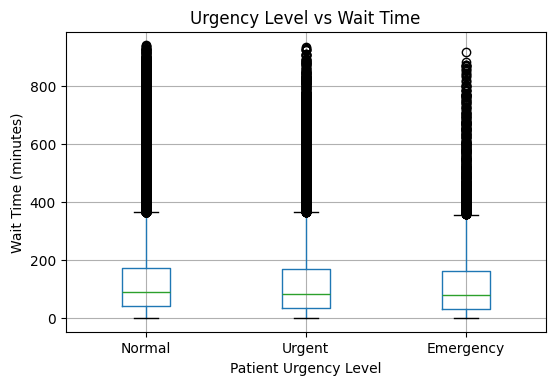

In [55]:
df.boxplot(column="wait_time_expected", by="urgency_level", figsize=(6,4))
plt.title("Urgency Level vs Wait Time")
plt.suptitle("")
plt.xticks([1, 2, 3], ["Normal", "Urgent", "Emergency"])
plt.xlabel("Patient Urgency Level")
plt.ylabel("Wait Time (minutes)")
plt.show()


In [56]:
# Peak Hour Analysis

df.groupby("is_peak_hour")["wait_time_expected"].mean()


,wait_time_expected
is_peak_hour,
0,130.043608
1,136.544161


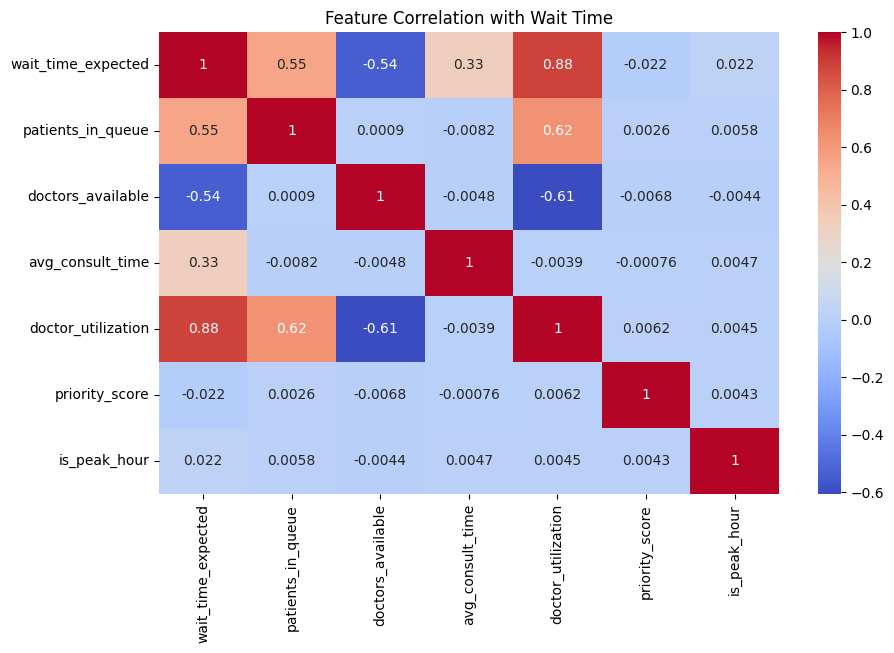

In [57]:

plt.figure(figsize=(10,6))
sns.heatmap(
    df[[
        "wait_time_expected",
        "patients_in_queue",
        "doctors_available",
        "avg_consult_time",
        "doctor_utilization",
        "priority_score",
        "is_peak_hour"
    ]].corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Feature Correlation with Wait Time")
plt.show()


In [58]:
# define x and y

feature_cols = [
    "age",
    "urgency_level",
    "visit_type",
    "arrival_slot",
    "patients_in_queue",
    "avg_consult_time",
    "doctors_available",
    "doctor_experience_avg",
    "is_peak_hour",
    "doctor_utilization",
    "priority_score"
]

x = df[feature_cols]
y = df["wait_time_expected"]


In [59]:
# train test split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_train.shape)
print(x_test.shape)


(80000, 11)
(20000, 11)


In [60]:
# model building ( Linear Regression (baseline))

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [61]:
# predict the model

y_pred = lr.predict(x_test)

In [62]:
# Evaluation of Model ( Linear Regression )

mae_lr = mean_absolute_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)

print("Linear Regression MAE:", mae_lr)
print("Linear Regression R²:", r2_lr)

Linear Regression MAE: 29.26514994109923
Linear Regression R²: 0.8979583990819958


In [63]:
# main model building ( Random Forest )

rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=12,
    random_state=42,
    n_jobs=-1
)

rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=12, n_jobs=-1, random_state=42)

In [64]:
# predicting the main model

y_pred_rf = rf.predict(x_test)


In [65]:
# Evaluating the main model

mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest MAE:", mae_rf)
print("Random Forest R²:", r2_rf)

Random Forest MAE: 3.523689616930036
Random Forest R²: 0.9990196321923206


In [66]:
# Get feature importance
importances = rf.feature_importances_

feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

feature_importance_df

,Feature,Importance
9,doctor_utilization,0.790905
5,avg_consult_time,0.200957
4,patients_in_queue,0.007146
10,priority_score,0.000373
1,urgency_level,0.000293
8,is_peak_hour,0.000204
0,age,0.000058
7,doctor_experience_avg,0.000043
3,arrival_slot,0.000009
2,visit_type,0.000008


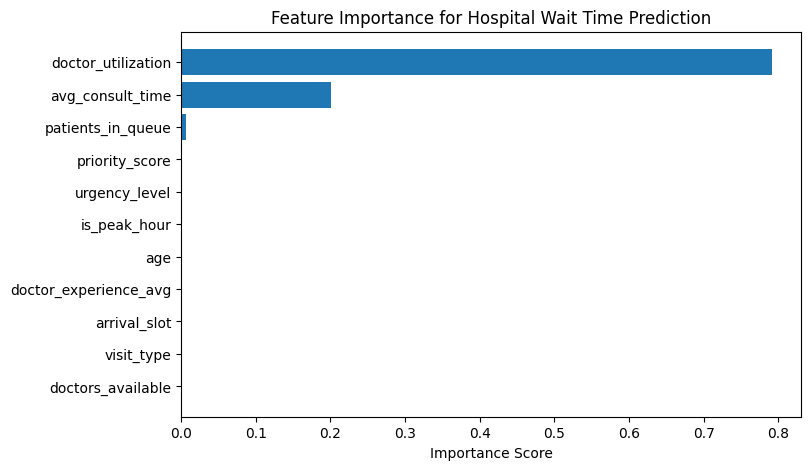

In [67]:
# Visualize Feature Importance

plt.figure(figsize=(8,5))
plt.barh(
    feature_importance_df["Feature"],
    feature_importance_df["Importance"]
)
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.title("Feature Importance for Hospital Wait Time Prediction")
plt.show()

# What-If Simulation (Decision Support Feature)
“What happens to waiting time if we add one more doctor?”

*This turns from prediction → decision support system*

In [68]:
# Select a Sample Patient Case

sample = x_test.iloc[[0]].copy()
sample

,age,urgency_level,visit_type,arrival_slot,patients_in_queue,avg_consult_time,doctors_available,doctor_experience_avg,is_peak_hour,doctor_utilization,priority_score
75721,87,0,2,1,11,11,1,18.7,1,11.0,3


In [72]:
# Predict the Current Wait Time of Sample case

current_wait = rf.predict(sample)[0]
print(f"Current predicted wait time: {current_wait:.2f}")

Current predicted wait time: 124.37


In [73]:
sample_more_doctors = sample.copy()
sample_more_doctors["doctors_available"] += 1

# Recalculate doctor utilization
sample_more_doctors["doctor_utilization"] = (
    sample_more_doctors["patients_in_queue"] /
    sample_more_doctors["doctors_available"]
)

new_wait = rf.predict(sample_more_doctors)[0]
print("Predicted wait time after adding 1 doctor:", new_wait)


Predicted wait time after adding 1 doctor: 60.52066942654851


In [74]:
print("Wait time reduction:", current_wait - new_wait)


Wait time reduction: 63.845576925200234


# Wait-Time Range Prediction

In [75]:
# Compute prediction errors (residuals)

residuals = y_test - y_pred_rf
residual_std = np.std(residuals)

print("Residual standard deviation:", residual_std)

Residual standard deviation: 4.476655375729172


In [78]:
# Apply range prediction to a sample

sample = x_test.iloc[[0]].copy()

expected_wait = rf.predict(sample)[0]

min_wait = max(0, expected_wait - residual_std)
max_wait = expected_wait + residual_std

print(f"Expected Wait Time : {expected_wait:.2f} minutes")
print(f"Wait Time Range    : {min_wait:.2f} – {max_wait:.2f} minutes")


Expected Wait Time : 124.37 minutes
Wait Time Range    : 119.89 – 128.84 minutes


In [79]:
import joblib

# Save trained model
joblib.dump(rf, "hospital_wait_model.pkl")

# Save residual standard deviation (for range prediction)
residuals = y_test - y_pred_rf
residual_std = np.std(residuals)

joblib.dump(residual_std, "residual_std.pkl")


['residual_std.pkl']